In [1]:
from google.colab import files
uploaded = files.upload()


Saving heart_disease_uci.csv to heart_disease_uci.csv


In [2]:
import pandas as pd

# Replace 'heart.csv' with the actual file name if different
df = pd.read_csv('heart_disease_uci.csv')

# Show first few rows
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Step 1: Clean the Dataset


In [3]:
# Drop non-useful columns
df.drop(['id', 'dataset'], axis=1, inplace=True)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = df[col].astype(str)  # ensure all values are string
    df[col] = le.fit_transform(df[col])

# Check missing values
print("Missing values after encoding:\n", df.isnull().sum())

# Fill missing values with median (can also try KNN imputer or dropna)
df.fillna(df.median(numeric_only=True), inplace=True)


Missing values after encoding:
 age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalch       55
exang         0
oldpeak      62
slope         0
ca          611
thal          0
num           0
dtype: int64


Step 2: EDA – Correlation & Target Distribution

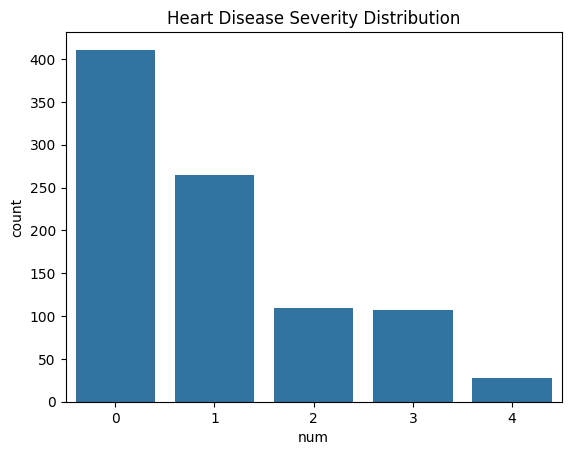

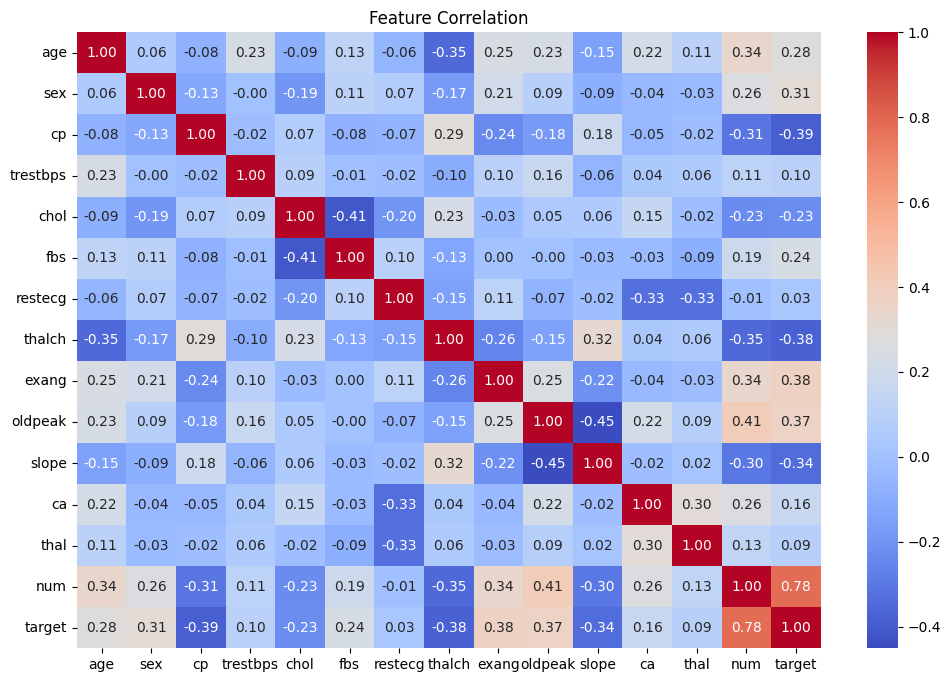

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target distribution
sns.countplot(x='num', data=df)
plt.title('Heart Disease Severity Distribution')
plt.show()

# Binary Classification: 0 = No disease, 1+ = Disease
df['target'] = (df['num'] > 0).astype(int)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()


Step 3: Model Training (Logistic Regression or Decision Tree)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X = df.drop(['num', 'target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose model: Logistic Regression or Decision Tree
model = LogisticRegression(max_iter=1000)
# model = DecisionTreeClassifier()  # use this instead if you prefer

model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Step 4: Evaluation – Accuracy, Confusion Matrix, ROC

Accuracy: 0.79


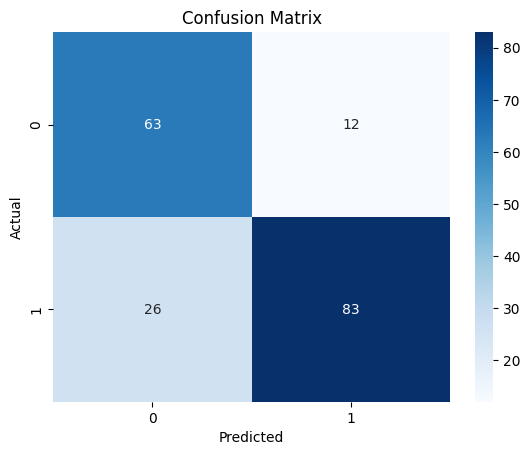

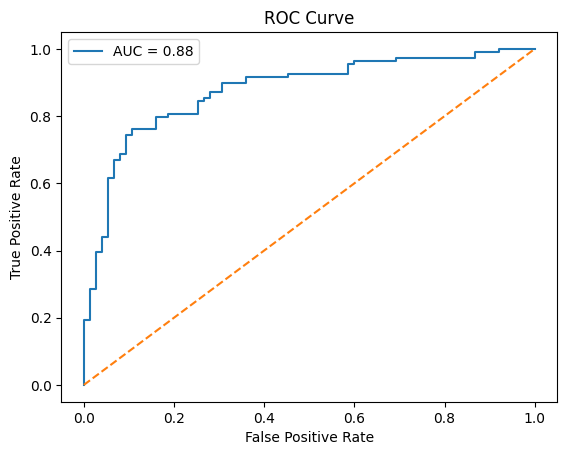

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Step 5: Feature Importance

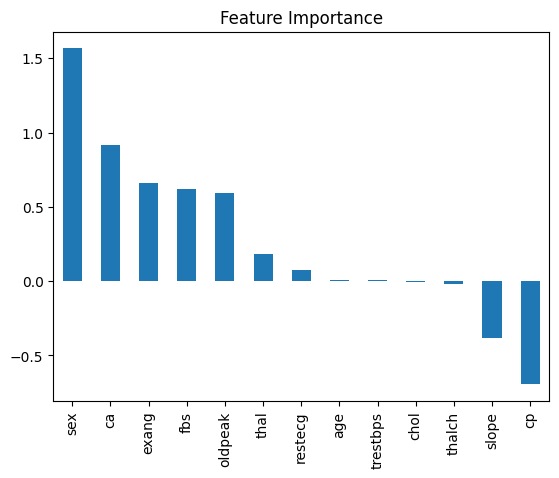

Top 5 Important Features:
sex        1.565211
ca         0.917595
exang      0.659509
fbs        0.622645
oldpeak    0.593778
dtype: float64


In [7]:
# Logistic Regression: Coefficients
import pandas as pd
importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)

importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

print("Top 5 Important Features:")
print(importance.head())
